# Car Price Project - Data Unterstanding and Data Cleaning

# 1- Business Understanding

<b>Context</b><br>
The used car market is growing rapidly, driven by the need for affordable vehicles and increased awareness of sustainability. Accurate pricing is crucial for sellers to maximize sales and customer satisfaction. Leveraging data science, this project aims to predict the sale price of used cars based on various features.

<b>Business Objective</b><br>
Develop a predictive model to assist sellers and buyers in determining the optimal price for used cars, considering factors like brand, model, year, mileage, and body type. The model will enhance negotiation efficiency and profit margins.

<b>Project Goal</b><br>
Create a linear regression model using historical sales data to predict car prices. The project will follow the CRISP-DM framework, and the model's performance will be evaluated based on error metrics.

<b>Success Criteria</b><br>
The project will succeed if the model predicts car prices within an acceptable error margin and is interpretable and generalizable across different market segments.

# 2- Data Understanding

## Import Python Libraries and Data

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [4]:
raw_data = pd.read_csv("../data/vehicles.csv")

In [5]:
#Configs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

## EDA (Exploratory Data Analysis)

In [6]:
raw_data.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/westtown-2007-ford-150/7222379453.html,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/westtown-silverado-2000/7221952215.html,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poughquag-2015-acura-rdx-warranty/7220195662.html,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pass-two-2002-bmw-tii/7209064557.html,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-suzuki-sx4/7219485069.html,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [7]:
raw_data.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [8]:
#Checking for duplicates
raw_data.duplicated().sum()

np.int64(0)

No duplicated data

In [9]:
#Checking missing values
columns = raw_data.columns

for col in columns:
    missing_values = raw_data[col].isnull().sum()/raw_data.shape[0]*100
    print(f'Percentage of missing values in {col}: {missing_values:.2f} %')

Percentage of missing values in id: 0.00 %
Percentage of missing values in url: 0.00 %
Percentage of missing values in region: 0.00 %
Percentage of missing values in region_url: 0.00 %
Percentage of missing values in price: 0.00 %
Percentage of missing values in year: 0.28 %
Percentage of missing values in manufacturer: 4.13 %
Percentage of missing values in model: 1.24 %
Percentage of missing values in condition: 40.79 %
Percentage of missing values in cylinders: 41.62 %
Percentage of missing values in fuel: 0.71 %
Percentage of missing values in odometer: 1.03 %
Percentage of missing values in title_status: 1.93 %
Percentage of missing values in transmission: 0.60 %
Percentage of missing values in VIN: 37.73 %
Percentage of missing values in drive: 30.59 %
Percentage of missing values in size: 71.77 %
Percentage of missing values in type: 21.75 %
Percentage of missing values in paint_color: 30.50 %
Percentage of missing values in image_url: 0.02 %
Percentage of missing values in desc

In [10]:
eda =raw_data.drop(columns=['id','url','region_url','county','image_url','posting_date'])

### Multivariate analysis

In [11]:
#Numeric columns
numerical_columns = eda.select_dtypes(include=['int64', 'float64']).columns

#Categorical columns
categorical_columns = eda.select_dtypes(include=['object', 'category']).columns

In [12]:
numerical_columns

Index(['price', 'year', 'odometer', 'lat', 'long'], dtype='object')

In [13]:
categorical_columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'description', 'state'],
      dtype='object')

#### Numeric Columns

In [14]:
eda[numerical_columns].describe()

,price,year,odometer,lat,long
count,426880.00,425675.00,422480.00,420331.00,420331.00
mean,75199.03,2011.24,98043.33,38.49,-94.75
std,12182282.17,9.45,213881.50,5.84,18.37
min,0.00,1900.00,0.00,-84.12,-159.83
25%,5900.00,2008.00,37704.00,34.60,-111.94
50%,13950.00,2013.00,85548.00,39.15,-88.43
75%,26485.75,2017.00,133542.50,42.40,-80.83
max,3736928711.00,2022.00,10000000.00,82.39,173.89


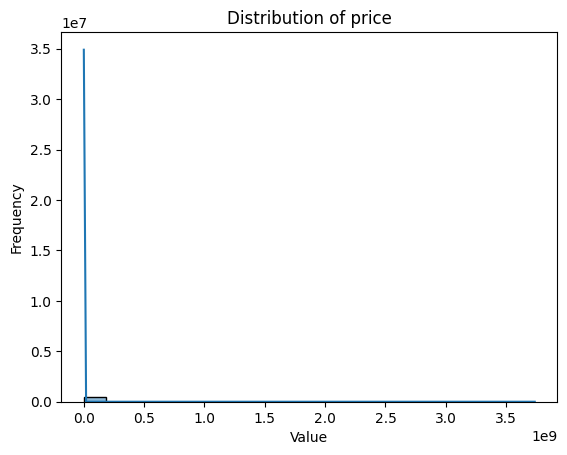

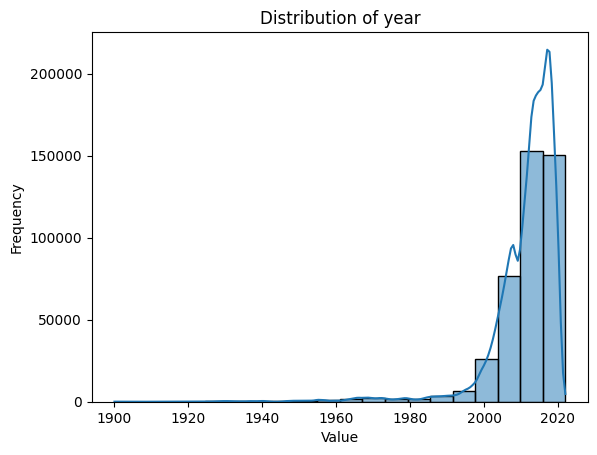

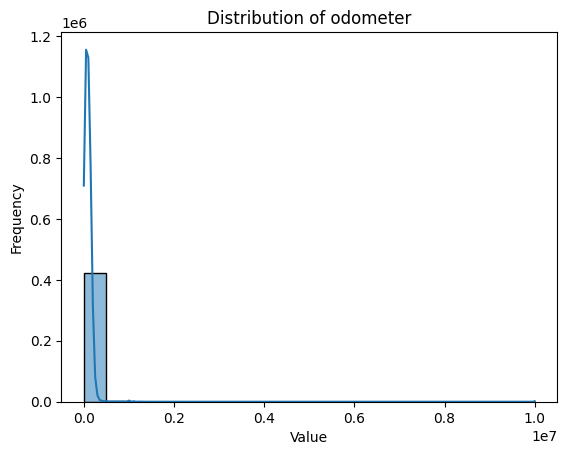

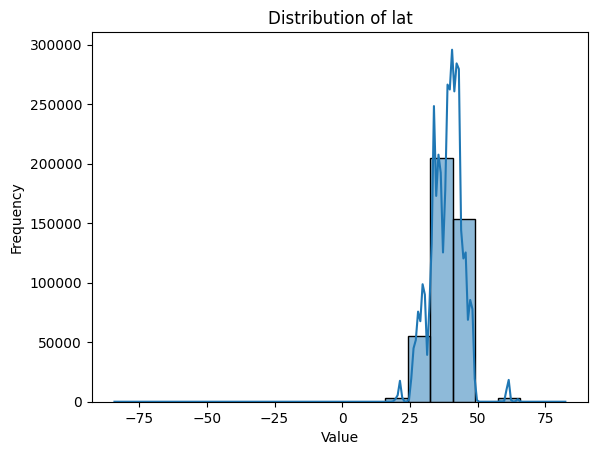

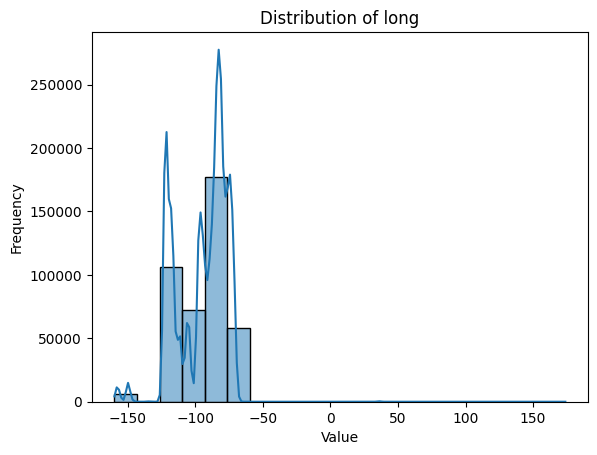

In [15]:
for col in numerical_columns:
    # Histogram
    sns.histplot(eda[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

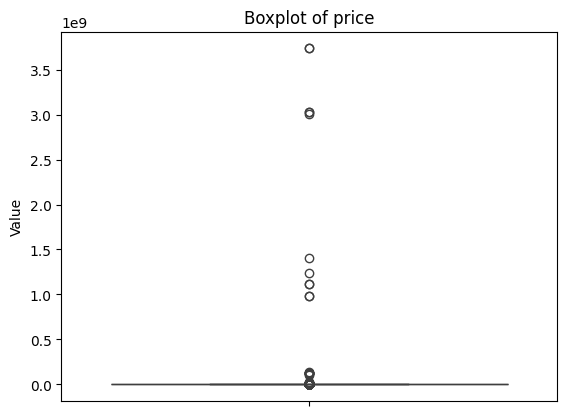

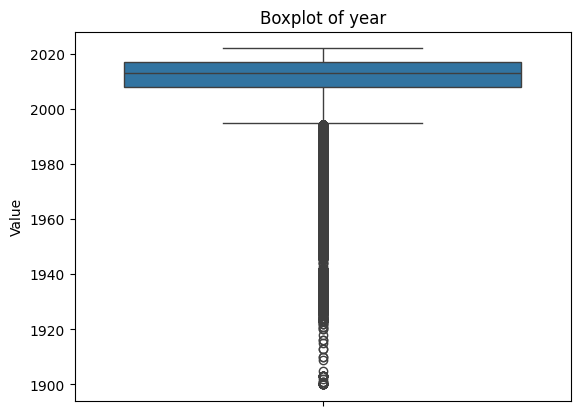

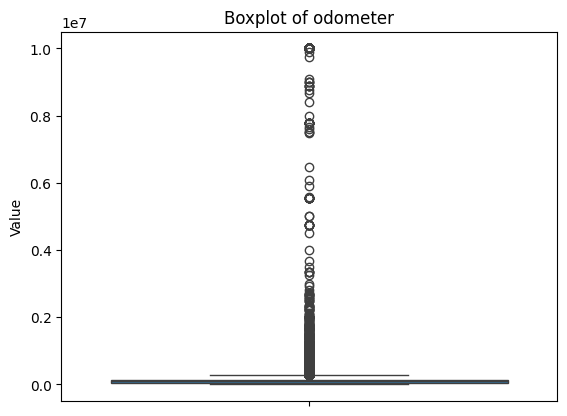

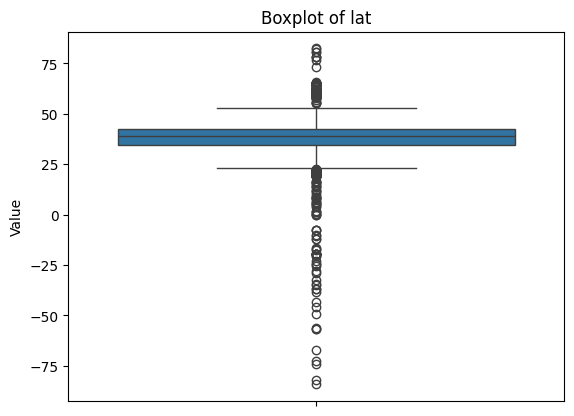

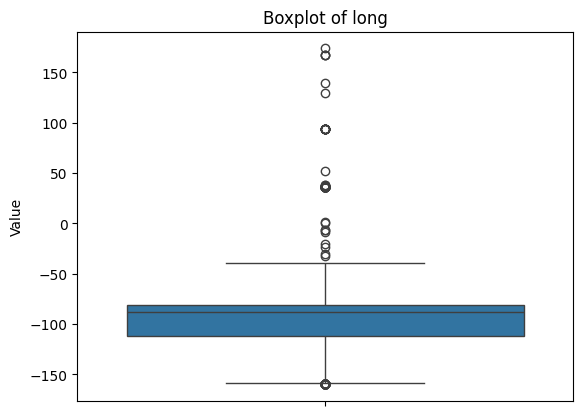

In [16]:
for col in numerical_columns: 
   # Boxplot
    sns.boxplot(y=eda[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Value')
    plt.show()

#### Categorical Columns

In [17]:
categorical_columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'description', 'state'],
      dtype='object')

Checking cardinality

In [18]:
cardinality= pd.DataFrame(eda[categorical_columns].nunique(),columns=['Cardinality'])
cardinality = cardinality.reset_index().sort_values(by='Cardinality', ascending=False)
cardinality.columns = ['Column', 'Cardinality']
cardinality

,Column,Cardinality
13,description,360911
8,VIN,118264
2,model,29667
0,region,404
14,state,51
1,manufacturer,42
11,type,13
12,paint_color,12
4,cylinders,8
3,condition,6


For model simplification reasons, we will drop the columns with high cardinality. We will drop description, VIN, model, region, year and state.

In [19]:
categorical_columns = cardinality[cardinality['Cardinality'] <= 42]['Column'].tolist()
categorical_columns

['manufacturer',
 'type',
 'paint_color',
 'cylinders',
 'condition',
 'title_status',
 'fuel',
 'size',
 'drive',
 'transmission']

FREQUENCY

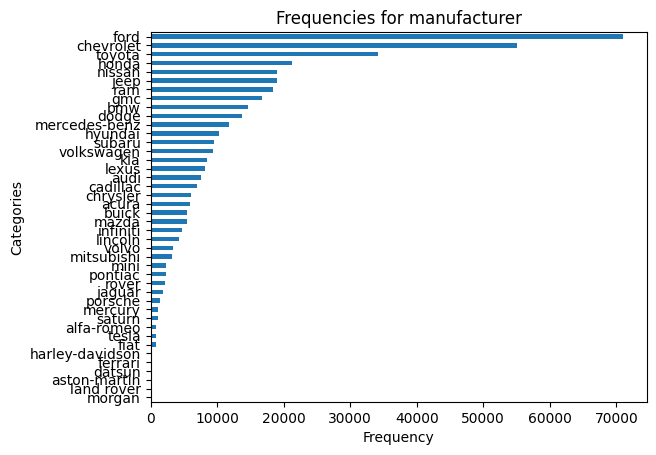

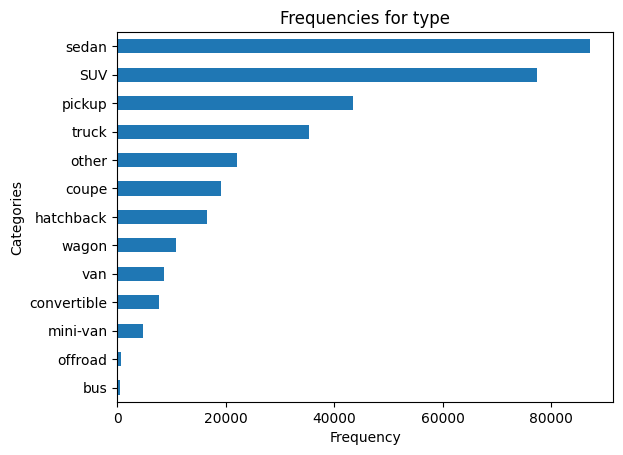

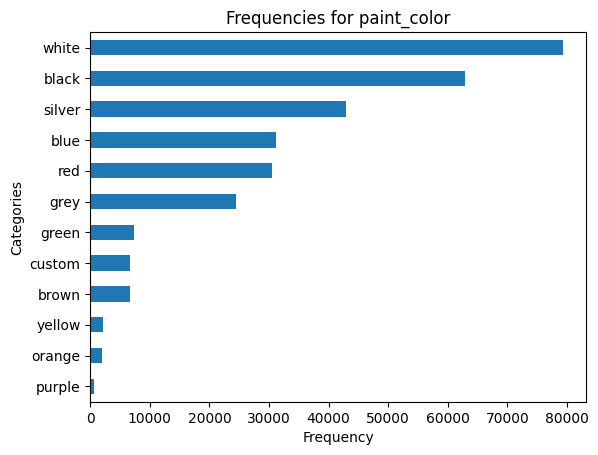

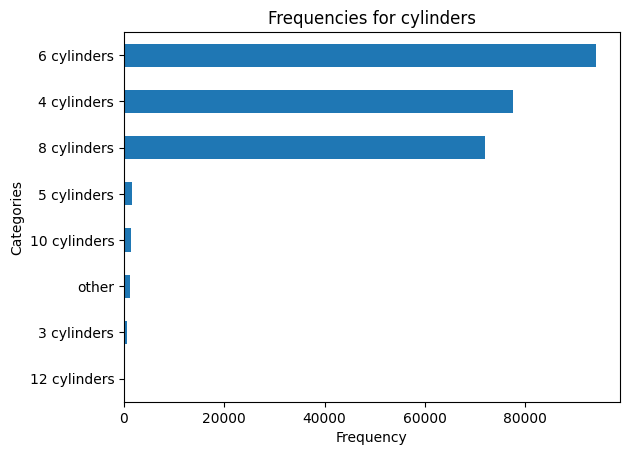

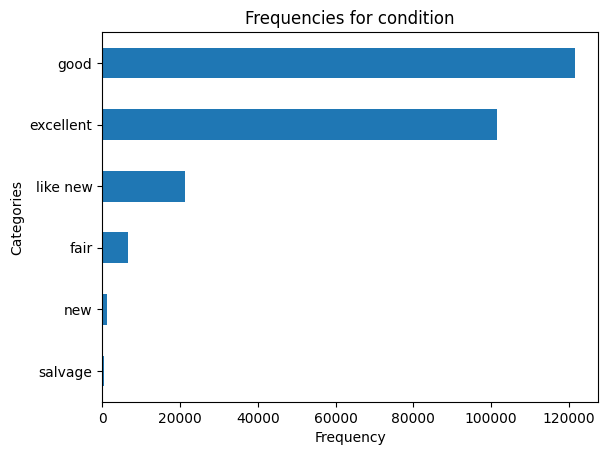

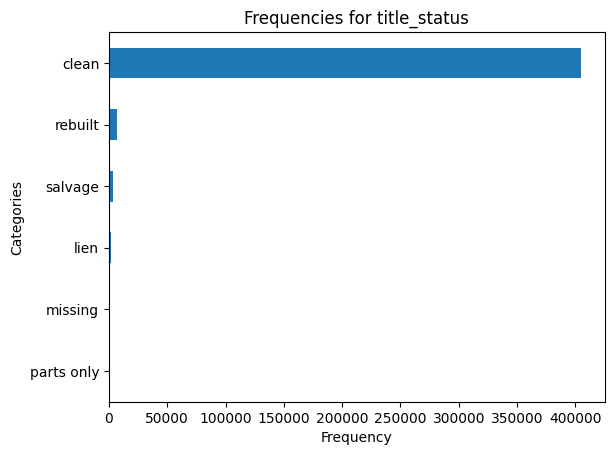

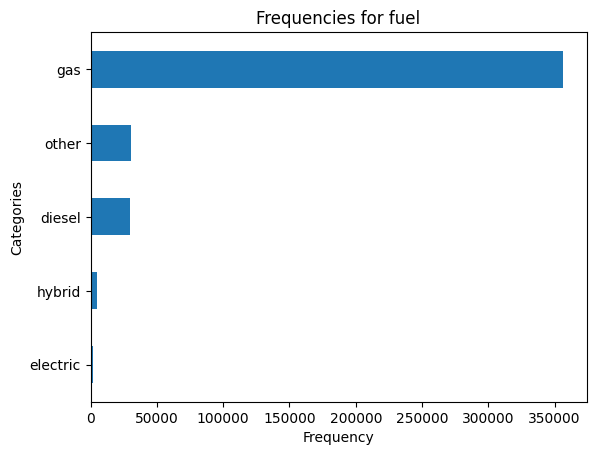

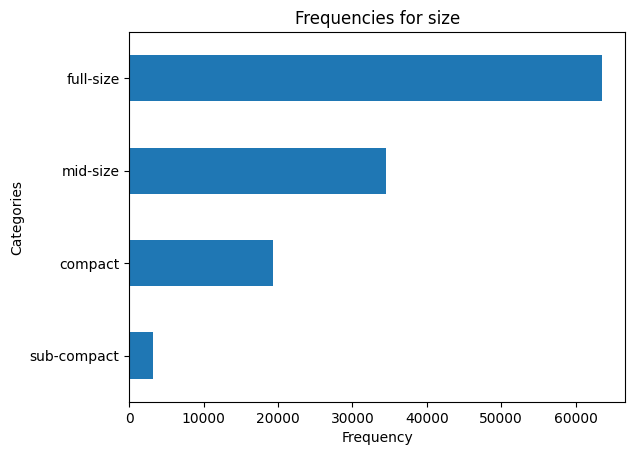

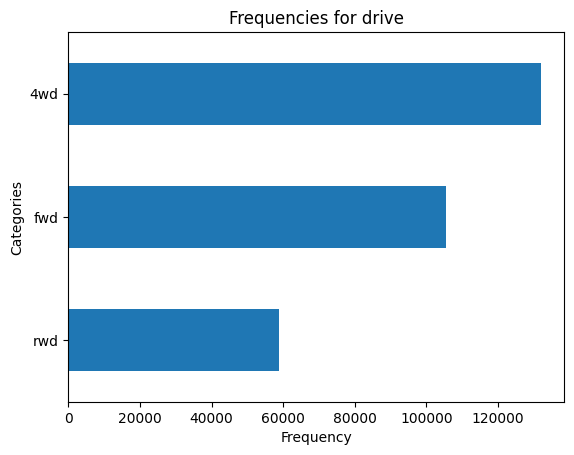

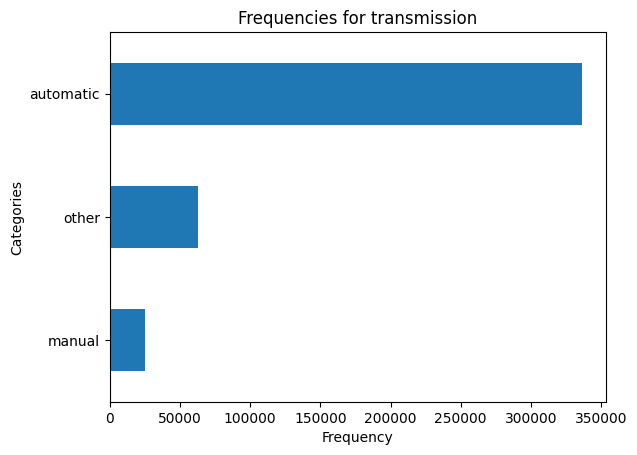

In [20]:
for col in categorical_columns:
    freq = eda[col].value_counts().sort_values(ascending=True)
    freq.plot(kind='barh')
    plt.title(f'Frequencies for {col}')
    plt.xlabel('Frequency')
    plt.ylabel('Categories')
    plt.show()

# 3 - Data Preparation

## Data Cleaning

- Drop Columns not relevant fot the project:
  - id (not relevant for objective)
  - url (not relevant for objective)
  - region_url (not relevant for objective)
  - image_url (not relevant for objective)
  - lat (not relevant for objective)
  - long (not relevant for objective)
  - posting_date (not relevant for objective)
  - title_status (not relevant for objective)
  - county (100% missing data)
  - size (71% missing data)
  - description (high cardinality)
  - VIN (high cardinality)
  - model (high cardinality)
  - region (high cardinality)
  - state (high cardinality)
- Missing data : drop missing values
- Zeros: as we are working with a dataset of used cars, we will consider the price and odometer with value=0 as an erros and drop those values.
- Outliers : remove the outliers
- Data Types : change the data type if necessary

### Drop columns

In [21]:
df = raw_data.drop(columns=['id','url','region_url','lat','long','posting_date','county','size','description','VIN','model','region','state','image_url','title_status'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   type          334022 non-null  object 
 10  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 35.8+ MB


### Missing Values

In [23]:
#Checking missing values
columns = df.columns

for col in columns:
    missing_values = df[col].isnull().sum()/df.shape[0]*100
    print(f'Percentage of missing values in {col}: {missing_values:.2f} %')

Percentage of missing values in price: 0.00 %
Percentage of missing values in year: 0.28 %
Percentage of missing values in manufacturer: 4.13 %
Percentage of missing values in condition: 40.79 %
Percentage of missing values in cylinders: 41.62 %
Percentage of missing values in fuel: 0.71 %
Percentage of missing values in odometer: 1.03 %
Percentage of missing values in transmission: 0.60 %
Percentage of missing values in drive: 30.59 %
Percentage of missing values in type: 21.75 %
Percentage of missing values in paint_color: 30.50 %


In [24]:
df_clean = df.dropna()

In [25]:
#Checking missing values
columns = df_clean.columns

for col in columns:
    missing_values = df_clean[col].isnull().sum()/df_clean.shape[0]*100
    print(f'Percentage of missing values in {col}: {missing_values:.2f} %')

Percentage of missing values in price: 0.00 %
Percentage of missing values in year: 0.00 %
Percentage of missing values in manufacturer: 0.00 %
Percentage of missing values in condition: 0.00 %
Percentage of missing values in cylinders: 0.00 %
Percentage of missing values in fuel: 0.00 %
Percentage of missing values in odometer: 0.00 %
Percentage of missing values in transmission: 0.00 %
Percentage of missing values in drive: 0.00 %
Percentage of missing values in type: 0.00 %
Percentage of missing values in paint_color: 0.00 %


### Price and Odometer with zeros

In [26]:
df_clean[['price','odometer']].describe()

,price,odometer
count,117169.00,117169.00
mean,60823.22,112283.77
std,11408077.86,224784.99
min,0.00,0.00
25%,5700.00,55666.00
50%,10993.00,102799.00
75%,22750.00,147848.00
max,3736928711.00,10000000.00


    As the data refers to sales of used cars, make no sense to have zeros in price and odometer. We are going to drop these values.

In [27]:
df_clean = df_clean[(df_clean['price']>0)&(df_clean['odometer']>0)]

### Outliers

In [28]:
numerical_columns= ['price','odometer'] 

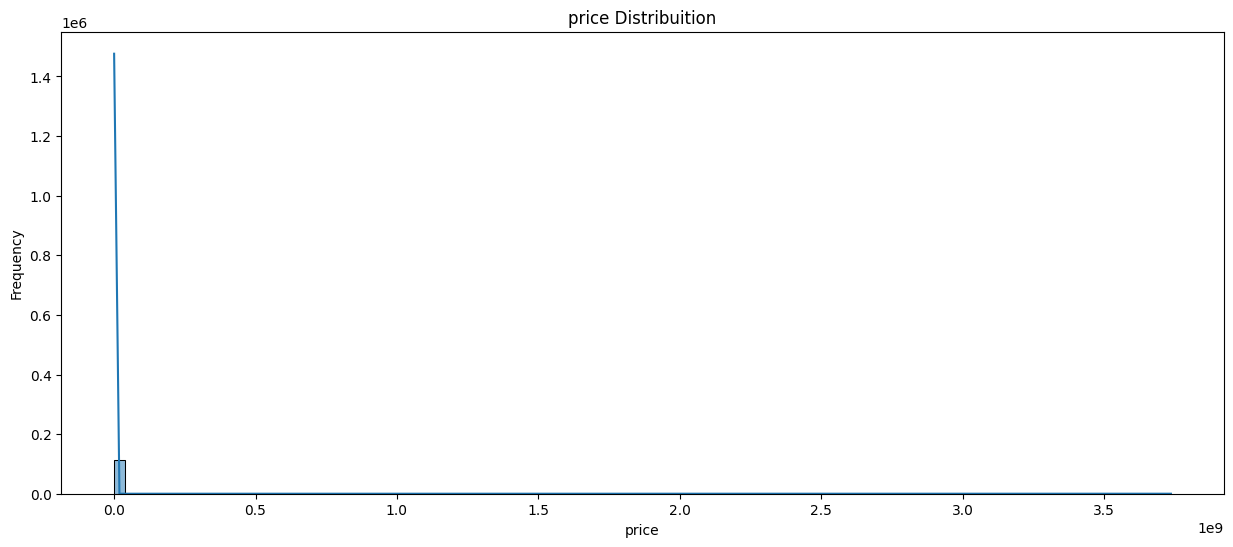

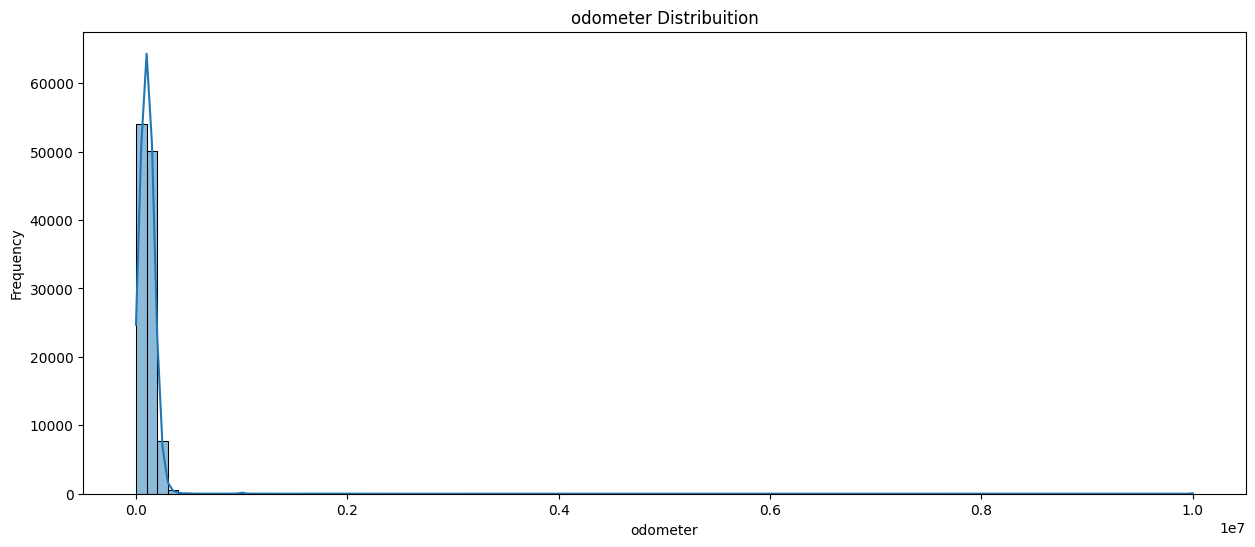

In [29]:
#Distribuition
for col in numerical_columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(df_clean[col], bins=100, kde=True)
    plt.title(f'{col} Distribuition')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

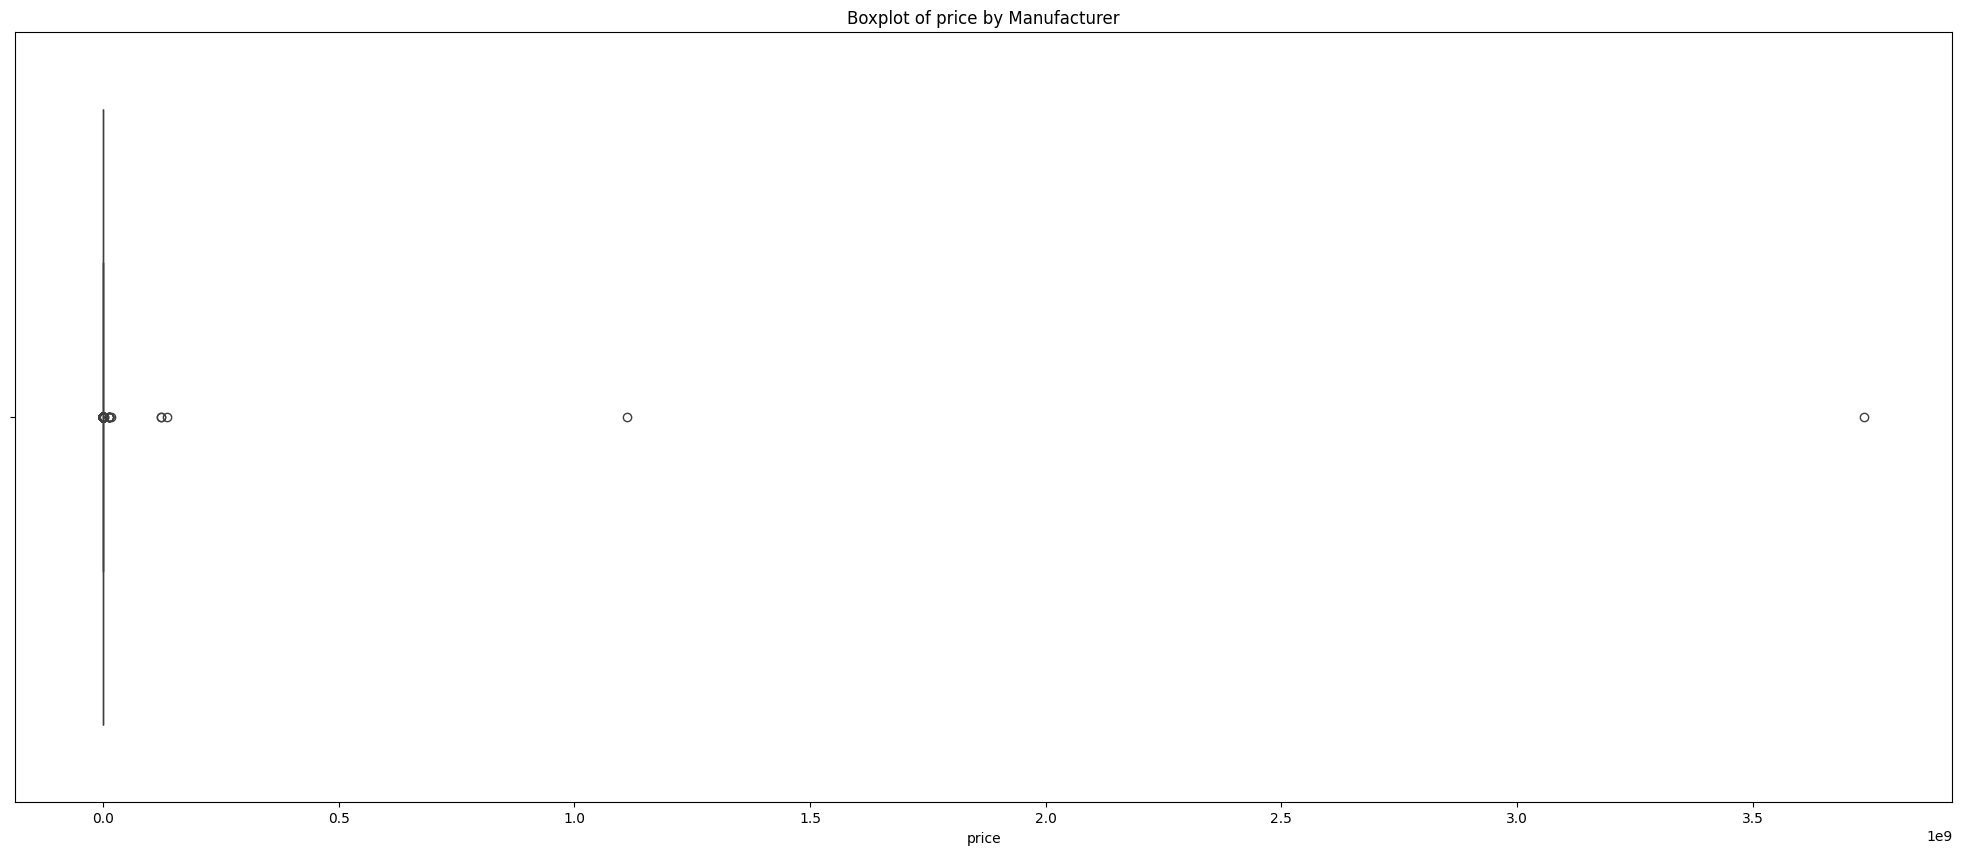

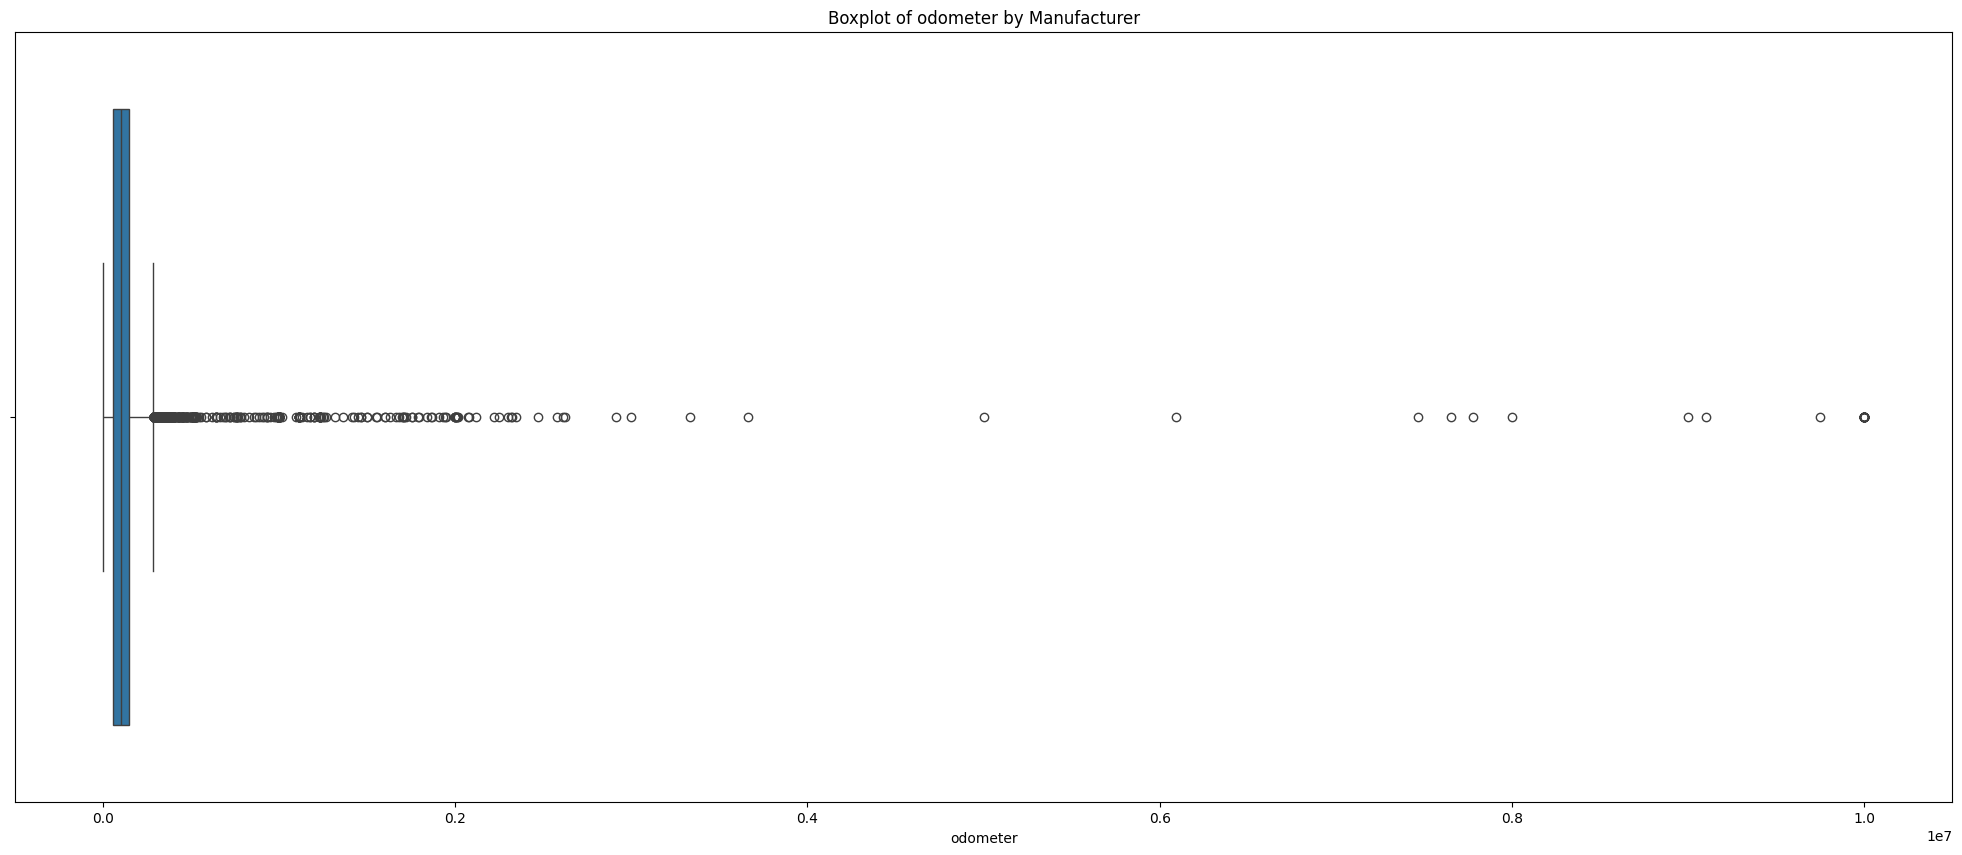

In [30]:
# Boxplot
for col in numerical_columns:
    plt.figure(figsize=(25,10))
    sns.boxplot(data=df_clean[col], orient='h')
    plt.title(f'Boxplot of {col} by Manufacturer')
    plt.show()

In [31]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [32]:
df_clean = remove_outliers(df_clean,'price')
df_clean = remove_outliers(df_clean,'odometer')

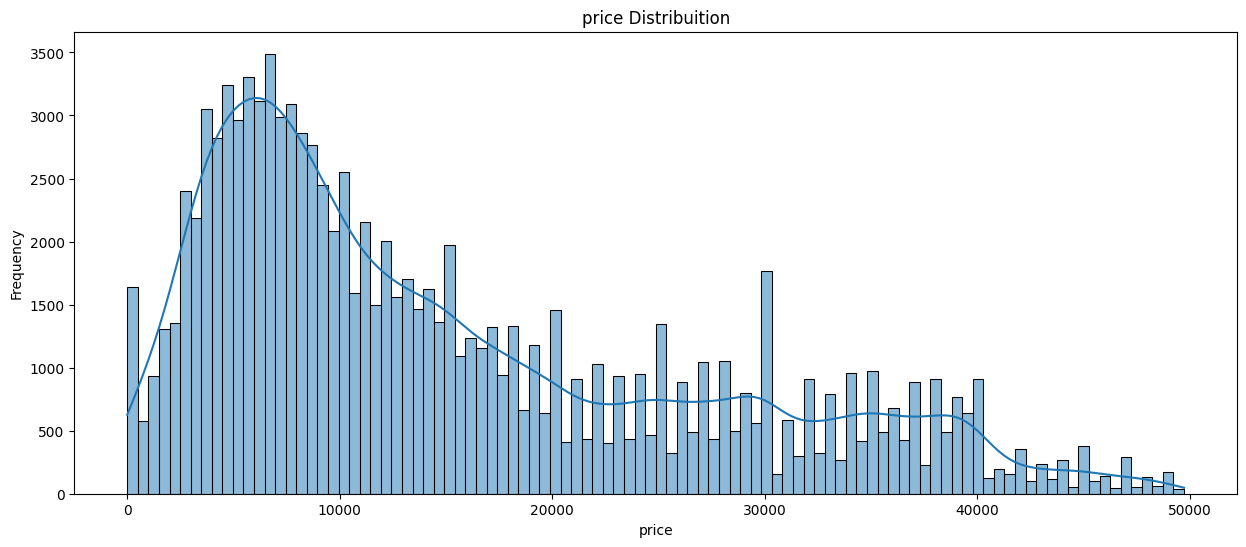

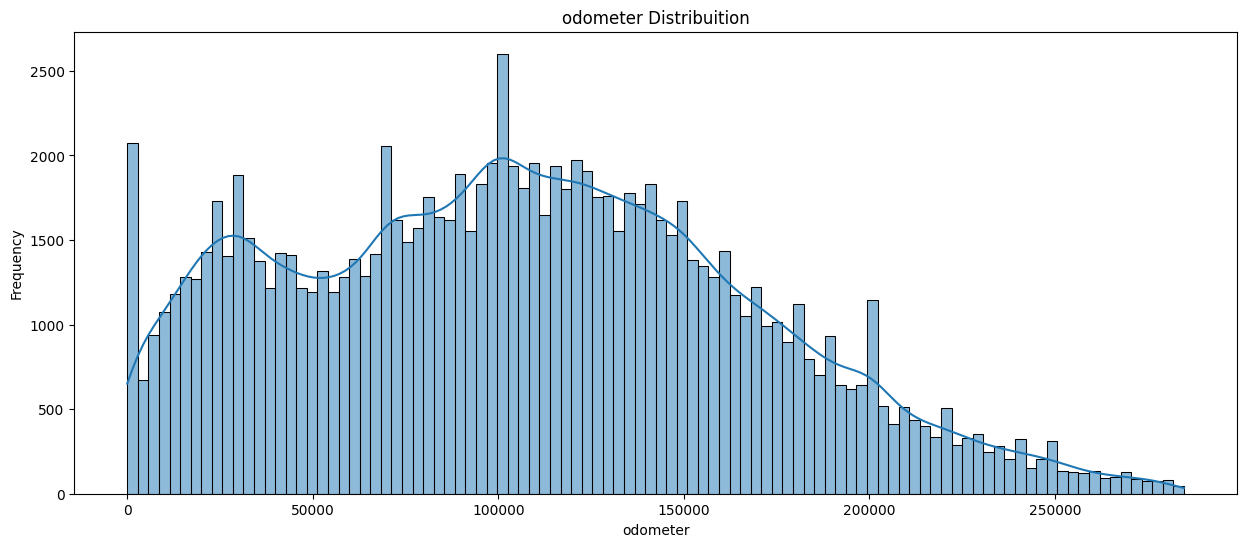

In [33]:
#Distribuition
for col in numerical_columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(df_clean[col], bins=100, kde=True)
    plt.title(f'{col} Distribuition')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

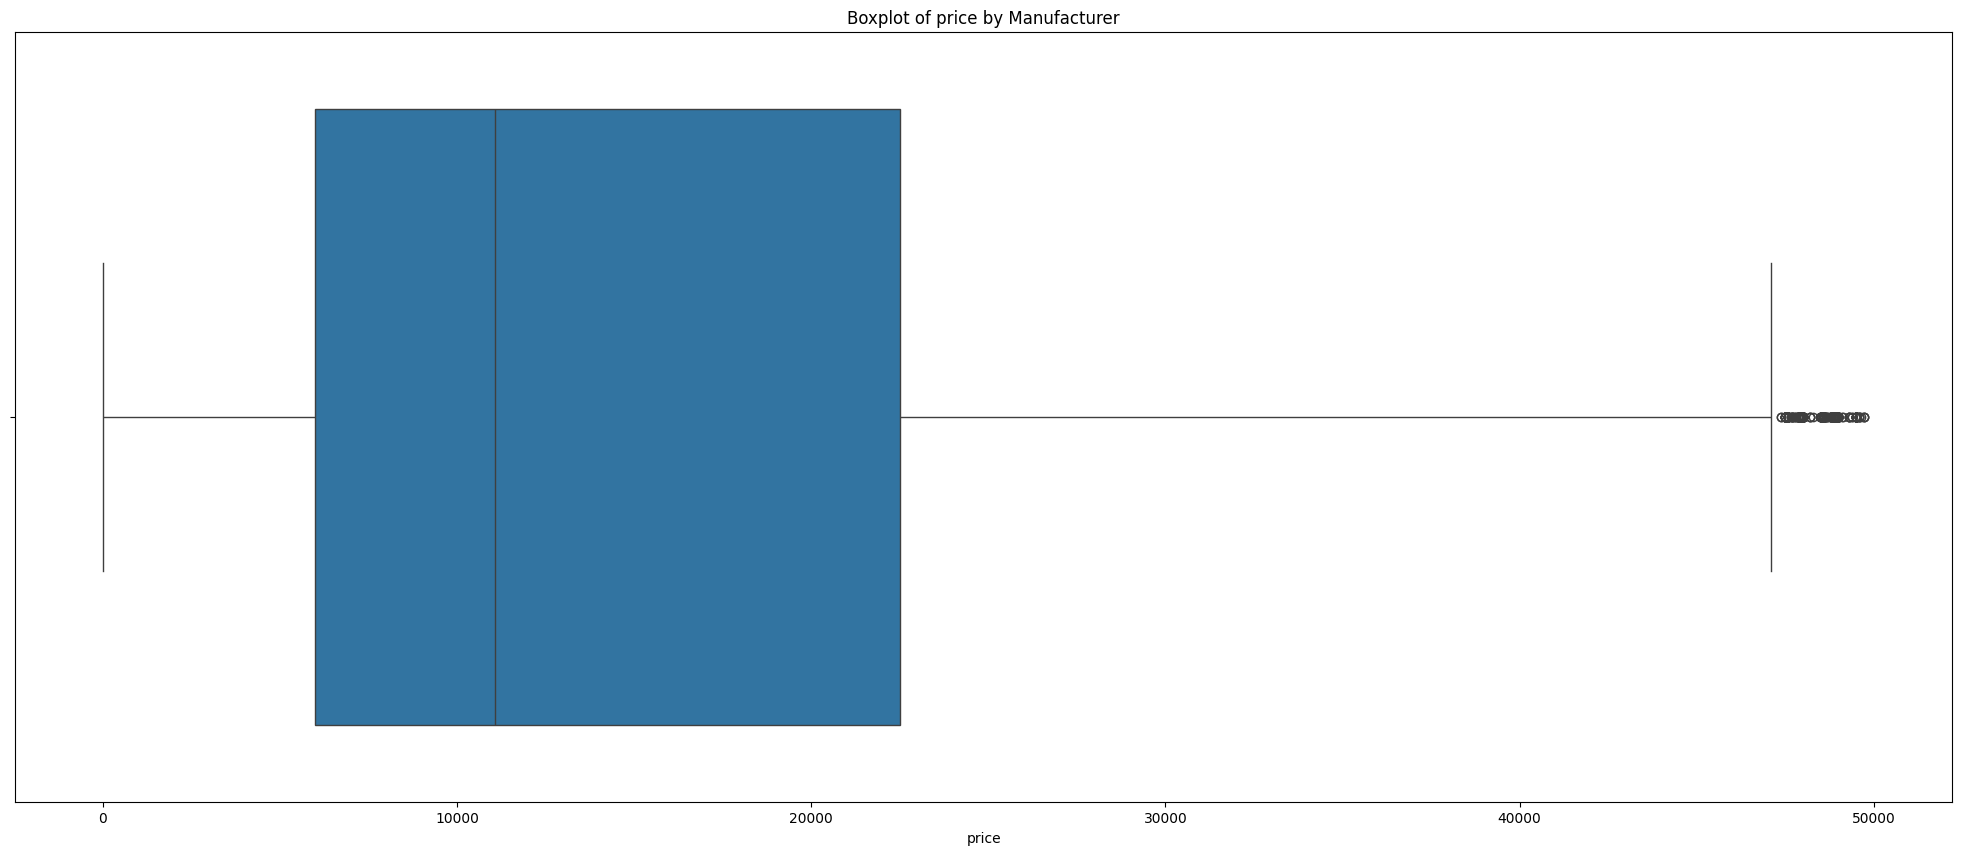

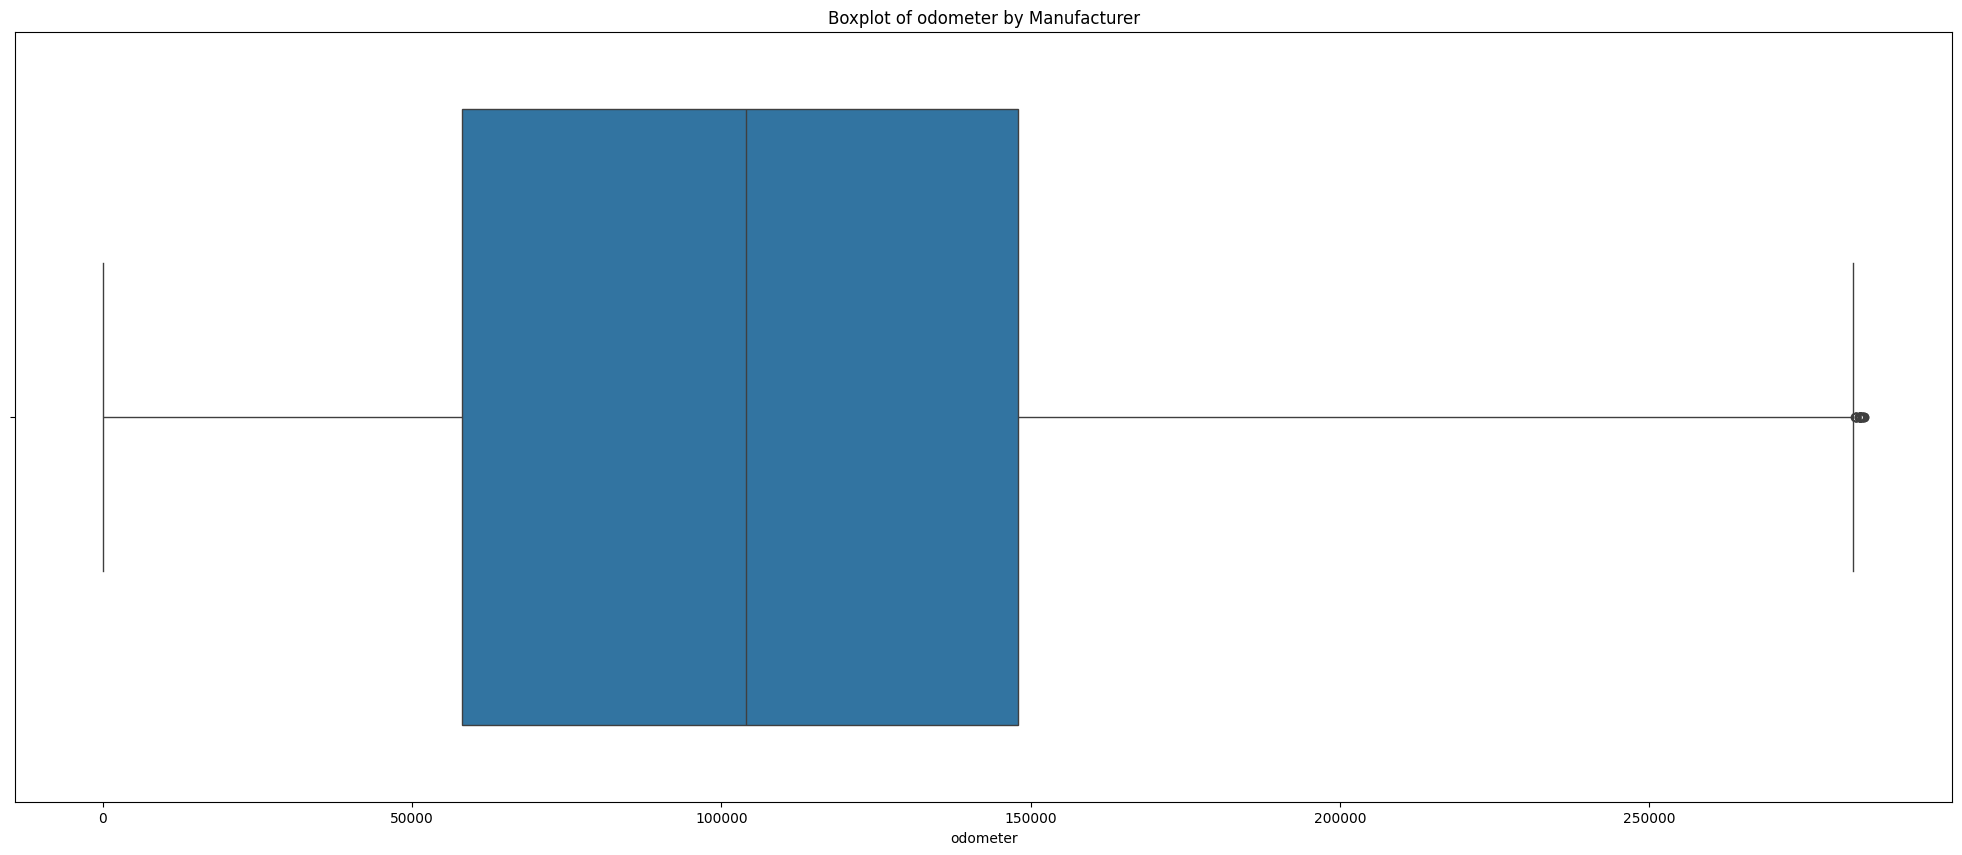

In [34]:
# Boxplot
for col in numerical_columns:
    plt.figure(figsize=(25,10))
    sns.boxplot(data=df_clean[col], orient='h')
    plt.title(f'Boxplot of {col} by Manufacturer')
    plt.show()

### Data Types

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109394 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         109394 non-null  int64  
 1   year          109394 non-null  float64
 2   manufacturer  109394 non-null  object 
 3   condition     109394 non-null  object 
 4   cylinders     109394 non-null  object 
 5   fuel          109394 non-null  object 
 6   odometer      109394 non-null  float64
 7   transmission  109394 non-null  object 
 8   drive         109394 non-null  object 
 9   type          109394 non-null  object 
 10  paint_color   109394 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 10.0+ MB


In [36]:
df_clean['year'] = df_clean['year'].astype(int)

## Feature Engineering

### Reducing Cardinality

In [37]:
categorical_columns = df_clean.select_dtypes(include=['object', 'category']).columns
cardinality = df_clean[categorical_columns].nunique()
print(cardinality)

manufacturer    42
condition        6
cylinders        8
fuel             5
transmission     3
drive            3
type            13
paint_color     12
dtype: int64


#### Manufacturer

In [38]:
df_clean['manufacturer'].value_counts(normalize=True)*100

manufacturer
ford              17.53
chevrolet         15.13
toyota             8.61
honda              5.86
nissan             5.46
jeep               5.08
gmc                4.01
dodge              3.67
ram                3.48
bmw                2.85
mercedes-benz      2.53
subaru             2.43
hyundai            2.28
volkswagen         2.11
lexus              1.96
chrysler           1.77
kia                1.75
cadillac           1.46
buick              1.37
infiniti           1.30
mazda              1.19
audi               1.12
acura              1.09
lincoln            1.02
pontiac            0.83
mitsubishi         0.80
volvo              0.72
mini               0.47
mercury            0.44
rover              0.41
saturn             0.38
jaguar             0.34
porsche            0.27
fiat               0.15
alfa-romeo         0.04
harley-davidson    0.03
tesla              0.02
datsun             0.02
land rover         0.01
ferrari            0.00
aston-martin       0.00
mor

In [39]:
# Definir um limite de frequência mínima (exemplo: 1%)
min_percentage = 1.0

# Criar uma nova coluna onde as marcas menos frequentes são agrupadas em 'Other'
df_clean['manufacturer_grouped'] = df_clean['manufacturer'].apply(
    lambda x: x if (df_clean['manufacturer'].value_counts(normalize=True) * 100)[x] >= min_percentage else 'Other'
)

In [40]:
df_clean.drop(columns='manufacturer', inplace=True)

#### Type

In [41]:
df_clean['type'].value_counts()

type
sedan          29818
SUV            25876
truck          13739
pickup         12054
coupe           7856
hatchback       4277
other           3263
van             3249
convertible     3188
wagon           2880
mini-van        2571
offroad          461
bus              162
Name: count, dtype: int64

In [42]:
# New group of 'types'
type_mapping = {
    'sedan': 'car',
    'coupe': 'car',
    'convertible': 'car',
    'hatchback': 'car',
    'wagon': 'car',
    'SUV': 'SUV',
    'offroad': 'SUV',
    'truck': 'truck/pickup',
    'pickup': 'truck/pickup',
    'van': 'van',
    'mini-van': 'van',
    'other': 'other',
    'bus': 'other'
}

# Apply map in 'type' column
df_clean['type_grouped'] = df_clean['type'].map(type_mapping)

We are going to focus in the prediction of cars price, therefore we will drop the types 'van' and 'other'.

In [43]:
remove = ['van','other']

df_clean = df_clean[~df_clean['type_grouped'].isin(remove)]

In [44]:
df_clean['type_grouped'].value_counts()

type_grouped
car             48019
SUV             26337
truck/pickup    25793
Name: count, dtype: int64

In [45]:
df_clean.drop(columns='type', inplace=True)

#### Paint Color

In [46]:
df_clean['paint_color'].value_counts()

paint_color
white     22597
black     19349
silver    14704
blue      11197
grey      11190
red       10886
green      3303
brown      2929
custom     2238
yellow      816
orange      616
purple      324
Name: count, dtype: int64

In [47]:
# Calculate the frequency of each color
df_clean['paint_color'].value_counts(normalize=True)*100

paint_color
white    22.56
black    19.32
silver   14.68
blue     11.18
grey     11.17
red      10.87
green     3.30
brown     2.92
custom    2.23
yellow    0.81
orange    0.62
purple    0.32
Name: proportion, dtype: float64

In [48]:
# New group of 'color'
color_mapping = {
    'white':'white',
    'black':'black',
    'silver':'silver',
    'blue':'blue',
    'red':'red',
    'grey':'grey',
    'green':'other',
    'brown':'other',
    'custom':'other',
    'yellow':'other',
    'orange':'other',
    'purple':'other'
}

# Apply map in 'type' column
df_clean['color_grouped'] = df['paint_color'].map(color_mapping)

In [49]:
df_clean['color_grouped'].value_counts()

color_grouped
white     22597
black     19349
silver    14704
blue      11197
grey      11190
red       10886
other     10226
Name: count, dtype: int64

In [50]:
df_clean.drop(columns='paint_color', inplace=True)

#### Final Cardinality

In [51]:
categorical_columns = df_clean.select_dtypes(include=['object', 'category']).columns
cardinality = df_clean[categorical_columns].nunique()
print(cardinality)

condition                6
cylinders                8
fuel                     5
transmission             3
drive                    3
manufacturer_grouped    25
type_grouped             3
color_grouped            7
dtype: int64


# Final Dataset

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100149 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   price                 100149 non-null  int64  
 1   year                  100149 non-null  int64  
 2   condition             100149 non-null  object 
 3   cylinders             100149 non-null  object 
 4   fuel                  100149 non-null  object 
 5   odometer              100149 non-null  float64
 6   transmission          100149 non-null  object 
 7   drive                 100149 non-null  object 
 8   manufacturer_grouped  100149 non-null  object 
 9   type_grouped          100149 non-null  object 
 10  color_grouped         100149 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 9.2+ MB


In [53]:
final_df_size = df_clean.shape[0]
df_size = df.shape[0]

print(f'The final data have {final_df_size} entries, witch represents {final_df_size/df_size*100:.2f}% of the raw data')

The final data have 100149 entries, witch represents 23.46% of the raw data


In [54]:
df_clean.to_csv(os.path.join('../data', 'data.csv'), index=False)